In [1]:
import h5py
import hdbscan
import matplotlib.pyplot as plt
import numpy as np

from neuropacks import ECOG
from pyuoi.decomposition import UoI_NMF 
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize 

from utils import *
%matplotlib inline

/Users/psachdeva/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/psachdeva/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_path = '/Users/psachdeva/data/ecog/r32_b7.mat'
grid_path = '/Users/psachdeva/data/ecog/grdid.mat'
ecog = ECOG(
    data_path=data_path,
    grid_path=grid_path
)

In [3]:
Y = ecog.get_response_matrix(
    bounds=(40, 60),
    band='HG'
)

In [4]:
# kill the dead indices
dead_indices = [19, 21, 0]
Y[:, dead_indices] = 0

In [5]:
Y = Y + np.abs(np.min(Y, axis=0, keepdims=True))
# Y[Y < 0] = 0

In [6]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=12)

In [7]:
uoi = UoI_NMF(
    n_boots=35,
    ranks=[30],
    nmf_max_iter=1000)

In [8]:
uoi.cluster = clusterer

In [9]:
for _ in range(10):
    uoi.fit(Y)
    print(uoi.components_.shape)

(17, 128)
(19, 128)
(18, 128)
(18, 128)
(18, 128)
(18, 128)
(17, 128)
(18, 128)
(14, 128)
(18, 128)


In [73]:
nmf = NMF(
    n_components=uoi.components_.shape[0],
    beta_loss='kullback-leibler',
    solver='mu',
    max_iter=1000,
    init='random'
)
nmf.fit(Y)

NMF(alpha=0.0, beta_loss='kullback-leibler', init='random', l1_ratio=0.0,
    max_iter=1000, n_components=14, random_state=None, shuffle=False,
    solver='mu', tol=0.0001, verbose=0)

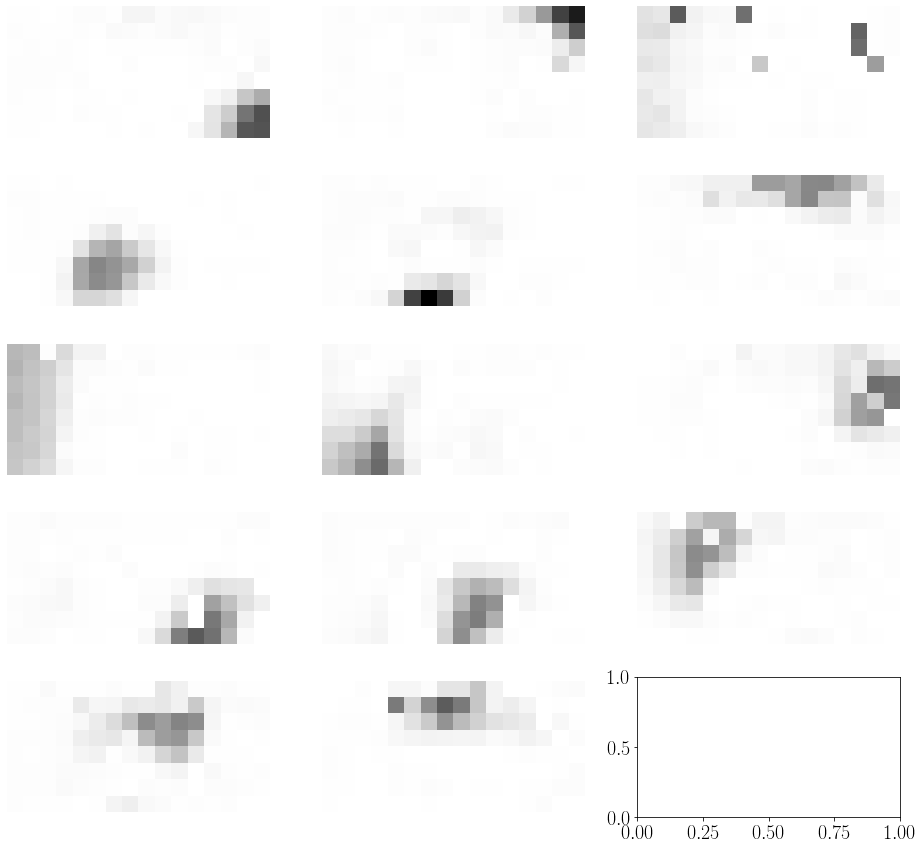

In [72]:
plot_ecog_bases(components=uoi.components_, ecog=ecog, vmax=np.max([uoi.components_]))
plt.show()

(<Figure size 1152x1080 with 15 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2119cba8>,
       dtype=object))

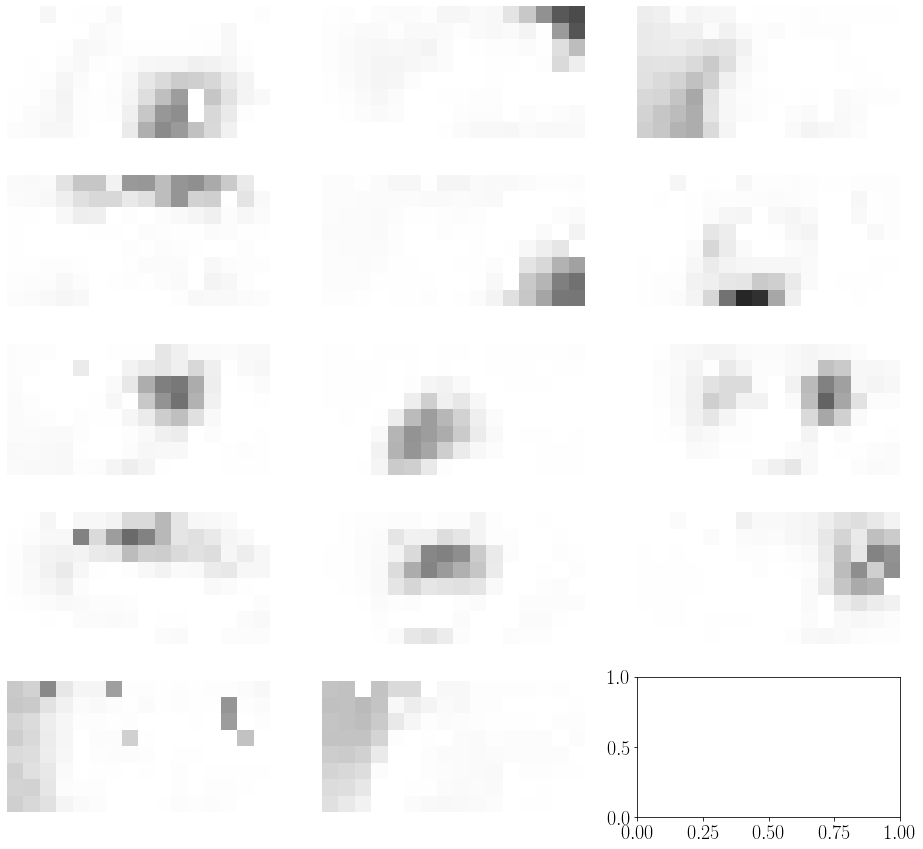

In [74]:
plot_ecog_bases(components=normalize(nmf.components_, norm='l2', axis=1), ecog=ecog, vmax=np.max([uoi.components_]))

In [14]:
uoi.components_.shape

(8, 128)

In [15]:
8//3

2

In [16]:
np.ceil(8/3)

3.0